In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("haberman_1.csv")

In [3]:
data.head()

,Age,Operation Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
%matplotlib inline

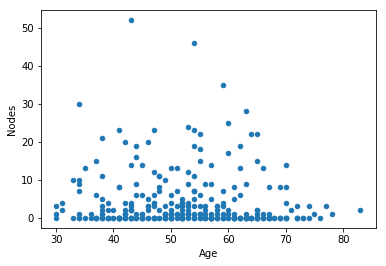

In [6]:
data.plot.scatter(x="Age", y="Nodes")

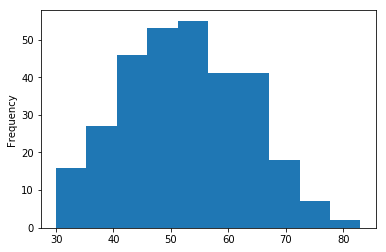

In [8]:
data.Age.plot.hist()

In [10]:
filter_survived = data["Survival"] == 1
df_survived = data[filter_survived]
df_survived.head()

,Age,Operation Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
data.shape

(306, 4)

In [12]:
df_survived.shape

(225, 4)

In [14]:
225/306

0.7352941176470589

In [21]:
df_survived[df_survived['Age'] >= 65].count() 

Age               27
Operation Year    27
Nodes             27
Survival          27
dtype: int64

In [23]:
data[data["Age"] >= 65].count()

Age               48
Operation Year    48
Nodes             48
Survival          48
dtype: int64

In [24]:
27/48

0.5625

In [26]:
df_survived[df_survived['Age']<40].count()

Age               36
Operation Year    36
Nodes             36
Survival          36
dtype: int64

In [27]:
data[data.Age <= 40].count()

Age               43
Operation Year    43
Nodes             43
Survival          43
dtype: int64

In [28]:
36/43

0.8372093023255814

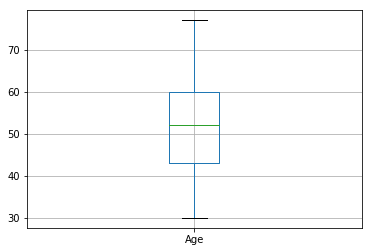

In [29]:
df_survived.boxplot('Age')


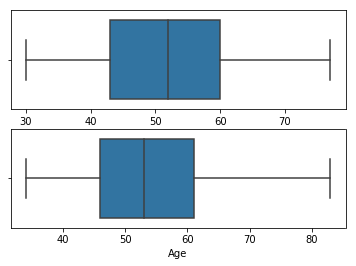

In [41]:
plt.figure(1)
plt.subplot(2,1,1)
sns.boxplot(x='Age',data=df_survived)
plt.subplot(2,1,2)
sns.boxplot(x='Age',data=df_unsurvived)

In [33]:
df_unsurvived = data[data['Survival'] == 2]

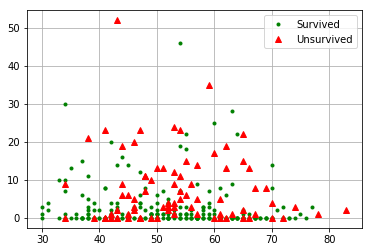

In [34]:
plt.plot(df_survived.Age, df_survived.Nodes,'g.',label='Survived')
plt.plot(df_unsurvived.Age, df_unsurvived.Nodes,'r^',label='Unsurvived')
plt.grid()
plt.legend()

In [80]:
df_survived['Bins'] = pd.cut(df_survived['Age'],[20,30,40,50,60,70,80,90])
df_unsurvived['Bins'] = pd.cut(df_unsurvived['Age'],[20,30,40,50,60,70,80,90])
df_survived_groupby =  df_survived.groupby('Bins',as_index=False).sum()
df_unsurvived_groupby =  df_unsurvived.groupby('Bins',as_index=False).sum()


/home/kailash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:

df_unsurvived_groupby['Survived_count'] = df_unsurvived_groupby['Count'] 
df_unsurvived_groupby

,Bins,Age,Operation Year,Nodes,Survival,Count,Survived_count
0,"(20, 30]",0,0,0,0,0.0,0.0
1,"(30, 40]",145,260,30,8,4.0,4.0
2,"(40, 50]",1313,1828,224,58,29.0,29.0
3,"(50, 60]",1416,1637,232,52,26.0,26.0
4,"(60, 70]",1167,1113,112,36,18.0,18.0
5,"(70, 80]",224,193,4,6,3.0,3.0
6,"(80, 90]",83,58,2,2,1.0,1.0


In [95]:
df_unsurvived_groupby = df_unsurvived_groupby.drop('Count',axis=1)

In [88]:
df_unsurvived_groupby['Count'] = df_unsurvived_groupby['Survival']/2
df_unsurvived_groupby

,Bins,Age,Operation Year,Nodes,Survival,Count
0,"(20, 30]",0,0,0,0,0.0
1,"(30, 40]",145,260,30,8,4.0
2,"(40, 50]",1313,1828,224,58,29.0
3,"(50, 60]",1416,1637,232,52,26.0
4,"(60, 70]",1167,1113,112,36,18.0
5,"(70, 80]",224,193,4,6,3.0
6,"(80, 90]",83,58,2,2,1.0


IndexError: tuple index out of range

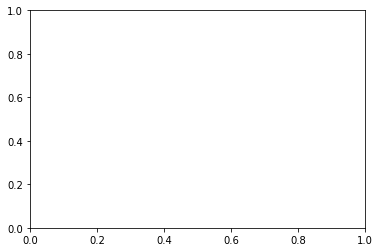

In [89]:
plt.plot(df_survived_groupby['Bins'],df_survived_groupby['Count'])

In [90]:
df_unsurvived_groupby.dtypes

Bins              category
Age                  int64
Operation Year       int64
Nodes                int64
Survival             int64
Count              float64
dtype: object

In [96]:
df_survived_groupby

,Bins,Age,Operation Year,Nodes,Survival,Survived_count
0,"(20, 30]",90,191,4,3,3
1,"(30, 40]",1319,2222,130,36,36
2,"(40, 50]",2926,4013,165,64,64
3,"(50, 60]",3710,4223,221,67,67
4,"(60, 70]",2924,2851,99,45,45
5,"(70, 80]",735,644,9,10,10
6,"(80, 90]",0,0,0,0,0


In [97]:
df_unsurvived_groupby

,Bins,Age,Operation Year,Nodes,Survival,Survived_count
0,"(20, 30]",0,0,0,0,0.0
1,"(30, 40]",145,260,30,8,4.0
2,"(40, 50]",1313,1828,224,58,29.0
3,"(50, 60]",1416,1637,232,52,26.0
4,"(60, 70]",1167,1113,112,36,18.0
5,"(70, 80]",224,193,4,6,3.0
6,"(80, 90]",83,58,2,2,1.0


In [114]:
df_groupby = df_unsurvived_groupby

In [115]:
df_groupby

,Bins,Age,Operation Year,Nodes,Survival,Unsurvived_count
0,"(20, 30]",0,0,0,0,0.0
1,"(30, 40]",145,260,30,8,4.0
2,"(40, 50]",1313,1828,224,58,29.0
3,"(50, 60]",1416,1637,232,52,26.0
4,"(60, 70]",1167,1113,112,36,18.0
5,"(70, 80]",224,193,4,6,3.0
6,"(80, 90]",83,58,2,2,1.0


In [116]:
df_groupby['Survived_count'] = df_survived_groupby['Survived_count']

In [117]:
df_groupby['Unsurvived_count'] = df_unsurvived_groupby['Unsurvived_count']

In [118]:
df_groupby

,Bins,Age,Operation Year,Nodes,Survival,Unsurvived_count,Survived_count
0,"(20, 30]",0,0,0,0,0.0,3
1,"(30, 40]",145,260,30,8,4.0,36
2,"(40, 50]",1313,1828,224,58,29.0,64
3,"(50, 60]",1416,1637,232,52,26.0,67
4,"(60, 70]",1167,1113,112,36,18.0,45
5,"(70, 80]",224,193,4,6,3.0,10
6,"(80, 90]",83,58,2,2,1.0,0


In [119]:
df_groupby = df_groupby.drop(['Age','Operation Year','Nodes','Survival'],axis=1)

In [120]:
df_groupby

,Bins,Unsurvived_count,Survived_count
0,"(20, 30]",0.0,3
1,"(30, 40]",4.0,36
2,"(40, 50]",29.0,64
3,"(50, 60]",26.0,67
4,"(60, 70]",18.0,45
5,"(70, 80]",3.0,10
6,"(80, 90]",1.0,0


In [121]:
df_groupby['Count'] = df_groupby['Survived_count'] + df_groupby['Unsurvived_count']

In [122]:
df_groupby

,Bins,Unsurvived_count,Survived_count,Count
0,"(20, 30]",0.0,3,3.0
1,"(30, 40]",4.0,36,40.0
2,"(40, 50]",29.0,64,93.0
3,"(50, 60]",26.0,67,93.0
4,"(60, 70]",18.0,45,63.0
5,"(70, 80]",3.0,10,13.0
6,"(80, 90]",1.0,0,1.0


In [123]:
df_groupby['Unsurvived_percent'] = (df_groupby['Unsurvived_count']/df_groupby['Count'])*100

In [124]:
df_groupby['Survived_percent'] = (df_groupby['Survived_count']/df_groupby['Count'])*100

In [125]:
df_groupby

,Bins,Unsurvived_count,Survived_count,Count,Unsurvived_percent,Survived_percent
0,"(20, 30]",0.0,3,3.0,0.000000,100.000000
1,"(30, 40]",4.0,36,40.0,10.000000,90.000000
2,"(40, 50]",29.0,64,93.0,31.182796,68.817204
3,"(50, 60]",26.0,67,93.0,27.956989,72.043011
4,"(60, 70]",18.0,45,63.0,28.571429,71.428571
5,"(70, 80]",3.0,10,13.0,23.076923,76.923077
6,"(80, 90]",1.0,0,1.0,100.000000,0.000000


In [129]:
Bin = list(range(20,90,10))
Bin

[20, 30, 40, 50, 60, 70, 80]

In [130]:
df_groupby['Bin'] = Bin

In [131]:
df_groupby

,Bins,Unsurvived_count,Survived_count,Count,Unsurvived_percent,Survived_percent,Bin
0,"(20, 30]",0.0,3,3.0,0.000000,100.000000,20
1,"(30, 40]",4.0,36,40.0,10.000000,90.000000,30
2,"(40, 50]",29.0,64,93.0,31.182796,68.817204,40
3,"(50, 60]",26.0,67,93.0,27.956989,72.043011,50
4,"(60, 70]",18.0,45,63.0,28.571429,71.428571,60
5,"(70, 80]",3.0,10,13.0,23.076923,76.923077,70
6,"(80, 90]",1.0,0,1.0,100.000000,0.000000,80


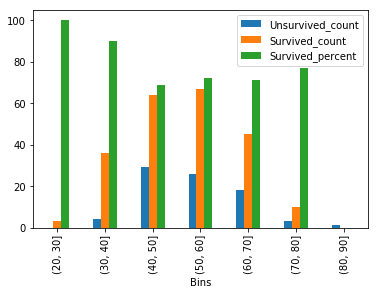

In [137]:
df_groupby.plot.bar(x="Bins", y=["Unsurvived_count", "Survived_count", "Survived_percent"])